In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as hc
from pyclustering.cluster.xmeans import xmeans
from chunk_utils import *
data_dir = './data/names'
image_dir = './images/'

In [2]:
# basic init
filenames = list(filter(lambda x: x.endswith('.kdt'), os.listdir(data_dir)))
matplotlib.rcParams['figure.figsize'] = 8,5
%load_ext autoreload
%autoreload 2

In [3]:
with open(data_dir+'//'+filenames[11], 'r') as fh:
    mydata = fh.read()
typedname, rawkd = mydata.split('\n')
raw_delays = kdata2delaysOLD(typedname, rawkd)
cumulative_delays = np.array([np.cumsum(delay1) for delay1 in raw_delays])


raw_delays = raw_delays.transpose()
cumulative_delays = cumulative_delays.transpose()

len(typedname), typedname, raw_delays.shape, cumulative_delays.shape

(11, 'Sreekanth C', (10, 20), (10, 20))

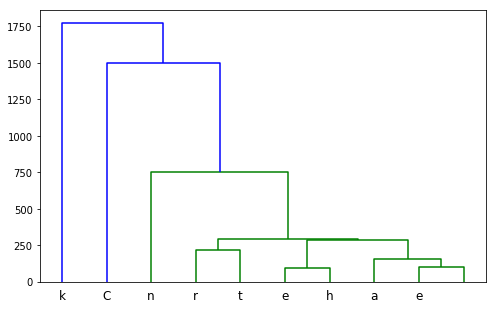

In [4]:
zz1 = hc.linkage(raw_delays,'single', optimal_ordering=False)
dn = hc.dendrogram(zz1, labels=typedname)

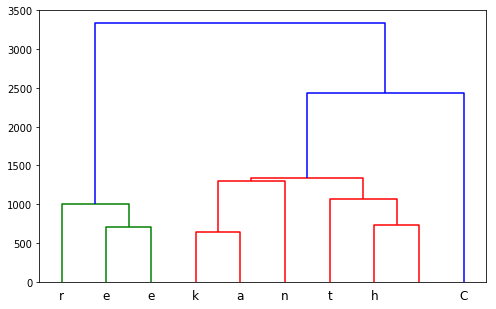

In [5]:
zz2 = hc.linkage(cumulative_delays,'single', optimal_ordering=True)
dn = hc.dendrogram(zz2, labels=typedname)

In [6]:
clus = xmeans(cumulative_delays)
clus.process()
cluster_ids = clus.get_clusters()

In [7]:
len(cluster_ids)

6

In [8]:
cluster_ids

[[0, 1, 2], [3], [4], [5], [6, 7, 8], [9]]

In [9]:
centers = clus.get_centers()

In [10]:
for c in centers:
    print (len(c), c)

20 [526.3333333333334, 564.3333333333334, 510.0, 565.6666666666666, 547.6666666666666, 513.3333333333334, 500.0, 479.3333333333333, 483.3333333333333, 591.3333333333334, 528.6666666666666, 609.3333333333334, 486.3333333333333, 526.0, 476.6666666666667, 504.6666666666667, 526.3333333333334, 529.0, 528.0, 525.6666666666666]
20 [1476.0, 1397.0, 1305.0, 1438.0, 1431.0, 1430.0, 1327.0, 1579.0, 1312.0, 1454.0, 1359.0, 1688.0, 1516.0, 1297.0, 1258.0, 1266.0, 1312.0, 2079.0, 1304.0, 1383.0]
20 [1704.0, 1546.0, 1453.0, 1579.0, 1564.0, 1570.0, 1453.0, 1712.0, 1437.0, 1609.0, 1508.0, 1820.0, 1671.0, 1398.0, 1392.0, 1383.0, 1422.0, 2274.0, 1422.0, 1500.0]
20 [1906.0, 1733.0, 2265.0, 1743.0, 2228.0, 1742.0, 1616.0, 1876.0, 1664.0, 1765.0, 1649.0, 1985.0, 1867.0, 1571.0, 1547.0, 1540.0, 1579.0, 2532.0, 1593.0, 1734.0]
20 [2403.6666666666665, 2221.0, 2767.6666666666665, 2248.0, 2750.6666666666665, 2283.6666666666665, 2138.0, 2373.3333333333335, 2174.3333333333335, 2291.3333333333335, 2140.33333333333